# SchemDraw Digital Samples
## Load my little helper library
```python
%load ../library/schemdraw_lib.py
%%writefile ../library/schemdraw_lib.py
```

In [1]:
# %load ../library/schemdraw_lib.py
# %%writefile ../library/schemdraw_lib.py
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

def create_cc(mainlabel='FF', label_l=None, label_t=None, label_r=None, label_b=None):
  tinputs = {'cnt':2, 'labels':['b','a']}
  rinputs = {'cnt':1, 'labels':['$c_{in}$']}
  linputs = {'cnt':1, 'labels':['$c_{out}$']}
  binputs = {'cnt':1, 'labels':['$s$']}
B = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs))

def create_ff(mainlabel='FF', label_l=None, label_t=None, label_r=None, label_b=None, clkSign=True):
  """create dynamically a flipflop

    All labels are lists with signal definition form top to bottom spread out evenly or from left to right.
    Labels can have Latex notation like '$\overline{Q}$'

    Args:
        label_l (list): List of IO label left ['D','E','clk']
        label_t (list): List of IO label left ['SET']
        label_r (list): List of IO label left ['Q', '$\overline{Q}$']
        label_b (list): List of IO label left ['CLR']
        noClkSign (bool): Defining if clk triangle should be drawn work only on left labels, (extents 'clk' to '  clk') 

    Returns:
        bool: The object

  """
  # Left IO
  if label_l:
    cnt = len(label_l)
    if cnt == 1:
      loc = [0.8]
    elif cnt == 2:
      loc = [0.8,0.2]
    elif cnt == 3:
      loc = [0.8,0.5,0.2]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    if clkSign:
      for i in range(cnt):
        if label_l[i] == 'clk':
          loc_clk = loc[label_l.index('clk')]
          label_l[i] = '  clk'
        elif label_l[i] == 'CLK':
          loc_clk = loc[label_l.index('CLK')]
          label_l[i] = '  CLK'
    # Create IO's
    ff_iol  = {'cnt'    :cnt,
               'labels' :label_l,
               'loc'    :loc,
               'lblsize':15}
  else:
    ff_iol = None
  # Top IO
  if label_t:
    cnt = len(label_t)
    if cnt == 1:
      loc = [0.5]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_iot  = {'cnt'    :cnt,
               'labels' :label_t,
               'loc'    :loc,
               'lblsize':12}
  else:
    ff_iot = None

  # Right IO
  if label_r:
    cnt = len(label_r)
    if cnt == 1:
      loc = [0.8]
    elif cnt == 2:
      loc = [0.8,0.2]
    elif cnt == 3:
      loc = [0.8,0.5,0.2]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_ior  = {'cnt'    :cnt,
               'labels' :label_r,
               'loc'    :loc,
               'lblsize':15}
  else:
    ff_ior = None

  # Bottom IO
  if label_b:
    cnt = len(label_b)
    if cnt == 1:
      loc = [0.5]
    else:
      loc = np.linspace(1,0,cnt+2)[1:-1]
    # Create IO's
    ff_iob  = {'cnt'    :cnt,
               'labels' :label_b,
               'loc'    :loc,
               'lblsize':12}
  else:
    ff_iob = None


  if clkSign:
    if 'loc_clk' in locals():
      print(loc_clk)
      clkSign_path = [[[0,loc_clk-0.2],[0.3,loc_clk],[0,loc_clk+0.2]]]
    DFF_0 =  e.blackbox(d.unit, d.unit*1.5, linputs=ff_iol, rinputs=ff_ior, tinputs=ff_iot, binputs=ff_iob, mainlabel=mainlabel)
    DFF = { 'name'  : mainlabel,
            'base'  : DFF_0,
            'paths' : clkSign_path # Add clk triangle
            #'paths' : [[[0,0.7],[0.3,0.9],[0,1.1]]] # Add clk triangle
          }
    return DFF
  else:
    return e.blackbox(d.unit, d.unit*1.5, linputs=ff_iol, rinputs=ff_ior, tinputs=ff_iot, binputs=ff_iob, mainlabel=mainlabel)

NameError: name 'd' is not defined

## Gate Circuit

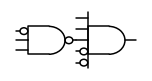

In [2]:
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

d = schem.Drawing(inches_per_unit=.5)


andgate = d.add(l.andgate(inputs=3, nand=True, inputnots=[1]))
andgate = d.add(l.andgate(inputs=5, nand=False, inputnots=[4,5]))
d.draw()

## JK-FlipFlop

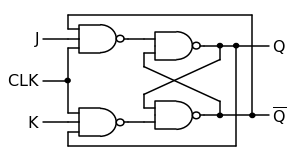

In [3]:
import SchemDraw as schem
import SchemDraw.logic as l

d = schem.Drawing()
# Two front gates (SR latch)
G1 = d.add(l.NAND2, anchor='in1')
d.add(e.LINE, l=d.unit/6)
Q1 = d.add(e.DOT)
d.add(e.LINE, l=d.unit/6)
Q2 = d.add(e.DOT)
d.add(e.LINE, l=d.unit/3, rgtlabel='$Q$')
G2 = d.add(l.NAND2, anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5])
d.add(e.LINE, l=d.unit/6)
Qb = d.add(e.DOT)
d.add(e.LINE, l=d.unit/3)
Qb2 = d.add(e.DOT)
d.add(e.LINE, l=d.unit/6, rgtlabel='$\overline{Q}$')
S1 = d.add(e.LINE, xy=G2.in1, d='up', l=d.unit/6)
d.add(e.LINE, d='down', xy=Q1.start, l=d.unit/6)
d.add(e.LINE, to=S1.end)
R1 = d.add(e.LINE, xy=G1.in2, d='down', l=d.unit/6)
d.add(e.LINE, d='up', xy=Qb.start, l=d.unit/6)
d.add(e.LINE, to=R1.end)

# Two back gates
d.add(e.LINE, xy=G1.in1, d='left', l=d.unit/6)
J = d.add(l.NAND3, anchor='out', reverse=True)
d.add(e.LINE, xy=J.in3, d='up', l=d.unit/6)
d.add(e.LINE, d='right', tox=Qb2.start)
d.add(e.LINE, d='down', toy=Qb2.start)
d.add(e.LINE, d='left', xy=J.in2, l=d.unit/4, lftlabel='$J$')
d.add(e.LINE, xy=G2.in2, d='left', l=d.unit/6)
K = d.add(l.NAND3, anchor='out', reverse=True)
d.add(e.LINE, xy=K.in1, d='down', l=d.unit/6)
d.add(e.LINE, d='right', tox=Q2.start)
d.add(e.LINE, d='up', toy=Q2.start)
d.add(e.LINE, d='left', xy=K.in2, l=d.unit/4, lftlabel='$K$')
C = d.add(e.LINE, d='down', xy=J.in1, toy=K.in3)
d.add(e.DOT, xy=C.center)
d.add(e.LINE, d='left', xy=C.center, l=d.unit/4, lftlabel='$CLK$')
d.draw()

## Half Adder

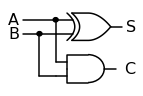

In [4]:
import SchemDraw as schem
import SchemDraw.logic as l
import SchemDraw.elements as e

d = schem.Drawing(unit=.5)
S = d.add(l.XOR2, rgtlabel='$S$')
A = d.add(e.DOT, xy=S.in1)
d.add(e.LINE, d='left', l=d.unit*2, lftlabel='$A$')
d.add(e.LINE, d='left', xy=S.in2)
B = d.add(e.DOT)
d.add(e.LINE, d='left', lftlabel='$B$')
d.add(e.LINE, d='down', xy=A.start, l=d.unit*3)
C = d.add(l.AND2, d='right', anchor='in1', rgtlabel='$C$')
d.add(e.LINE, d='down', xy=B.start, toy=C.in2)
d.add(e.LINE, to=C.in2)
d.draw()

## Adder

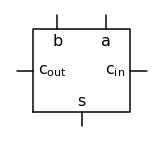

In [5]:
import SchemDraw as schem
import SchemDraw.logic as l

d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['b','a']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$s$']}
B = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs))

d.draw()

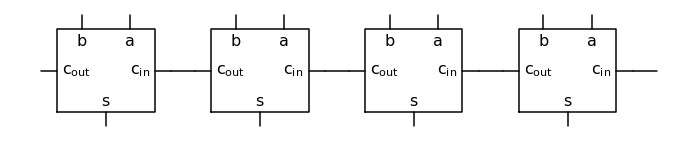

In [6]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['b','a']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$s$']}
fulladder1 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs))
line1 = d.add(e.LINE, d='right',  xy=fulladder1.c_in, l=d.unit/4)
fulladder2 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs), anchor='c_out')
line1 = d.add(e.LINE, d='right',  xy=fulladder2.c_in, l=d.unit/4)
fulladder3 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs), anchor='c_out')
line1 = d.add(e.LINE, d='right',  xy=fulladder3.c_in, l=d.unit/4)
fulladder4 = d.add(e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs), anchor='c_out')
line1 = d.add(e.LINE, d='right',  xy=fulladder4.c_in, l=d.unit/4)


d.draw()

# Mux

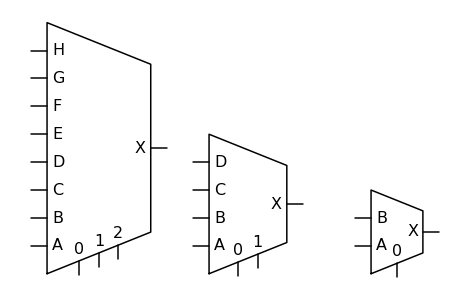

In [7]:
d = schem.Drawing()
m8 = d.add(e.mux(inputs=['A','B','C','D','E','F','G','H',], outputs=['X'], ctrls=['0','1', '2']))
m4 = d.add(e.mux(inputs=['A','B','C','D'], outputs=['X'], ctrls=['0','1']), xy=(5,0))
m2 = d.add(e.mux(inputs=['A','B'], outputs=['X'], ctrls=['0']), xy=(10,0))

d.draw()